## Punto 6:

In [3]:
import sys
import re
from os import listdir
from os.path import join, isdir
import matplotlib.pyplot as plt
import numpy as np
from unidecode import unidecode

In [4]:
regex_alpha_words = re.compile(r'[^a-zA-Z0-9]') # Cadenas alfanumericas sin acentos

In [5]:
# Extrae los tokens en una lista
def tokenizer(line):
    result = []
    initial_list_split = line.split()
    for token in initial_list_split:
        word = re.sub(regex_alpha_words,'',token)
        if word != '':
            result.append(word)
    return result

# Normalización
def normalize(token):
    new_token = unicode(token)
    return new_token.lower()

In [6]:
list_terms={}

with open("texto.txt",'r',encoding='utf-8') as f:
    for line in f:
        terms_list = tokenizer(line)
        for term in terms_list:
            if term in list_terms:
                list_terms[term]+=1
            else:
                list_terms[term]= 1   

In [7]:
# Ordenar el diccionario por clave
list_terms_sorted={}
for k, value in sorted(list_terms.items(),key=lambda x: x[1], reverse=True):
    list_terms_sorted[k]=value

print(list_terms_sorted.items())

dict_items([('que', 20549), ('de', 18001), ('y', 17166), ('la', 10202), ('a', 9589), ('el', 7962), ('en', 7907), ('no', 5795), ('se', 4707), ('los', 4681), ('con', 4053), ('por', 3779), ('las', 3423), ('lo', 3398), ('le', 3398), ('su', 3320), ('don', 2538), ('del', 2465), ('me', 2345), ('como', 2244), ('Quijote', 2167), ('Sancho', 2145), ('es', 2086), ('ms', 2031), ('un', 1928), ('yo', 1857), ('si', 1798), ('dijo', 1789), ('al', 1698), ('mi', 1685), ('para', 1431), ('ni', 1351), ('porque', 1333), ('una', 1319), ('ser', 1292), ('l', 1281), ('o', 1221), ('tan', 1219), ('sin', 1139), ('todo', 1085), ('respondi', 1053), ('ha', 1048), ('sus', 1048), ('haba', 1027), ('Y', 1022), ('bien', 964), ('seor', 948), ('as', 915), ('merced', 900), ('esto', 851), ('vuestra', 813), ('todos', 796), ('pero', 759), ('era', 738), ('te', 726), ('cuando', 711), ('cual', 703), ('qu', 702), ('ya', 700), ('sino', 694), ('dos', 672), ('s', 663), ('pues', 639), ('fue', 636), ('donde', 625), ('quien', 614), ('este'

#### Gráficos 

Coeficiente de correlación: -0.0926577621523779


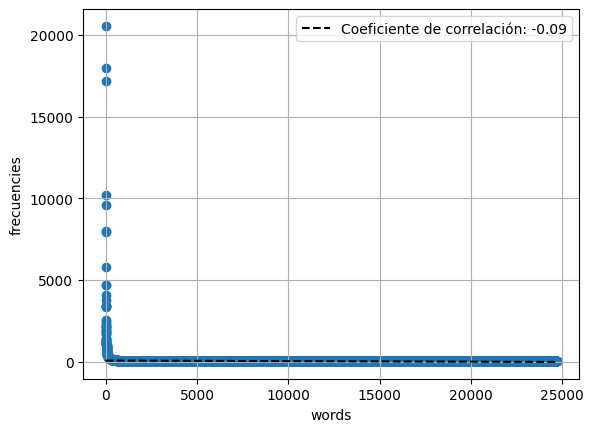

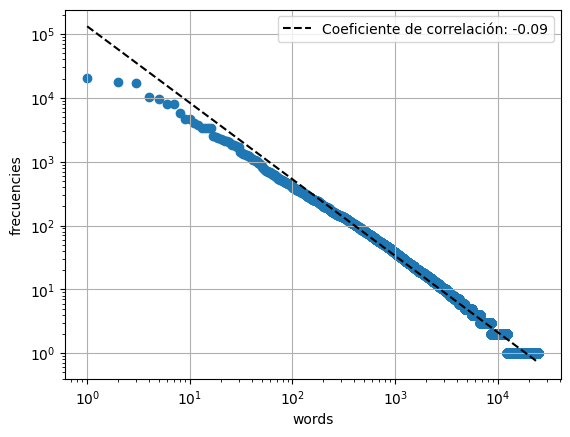

In [26]:
# Defino eje x e y
x = np.arange(1, len(list_terms_sorted) + 1)
y = nuevos_valores = [float(valor) for valor in list_terms_sorted.values()]

# Graficar de puntos y la curva ajustada (Escala Normal)

# Calcula el coeficiente de correlación de Pearson 
r = np.corrcoef(x, y)[0, 1]
print("Coeficiente de correlación:", r)

# Calcula los parámetros de la recta de regresión lineal
m, b = np.polyfit(x, y, 1)

# Crea una lista de valores x_fit para la recta de regresión lineal y una lista de valores y_fit correspondiente
x_fit = np.linspace(min(x), max(x), 100)
y_fit = m * x_fit + b

plt.scatter(x, y)
plt.plot(x_fit, y_fit, '--k', label=f"Coeficiente de correlación: {r:.2f}")
plt.ylabel("frecuencies")
plt.xlabel("words")
plt.legend()
plt.grid(True)
plt.show()

esc_nm_100 = m*100 +b
esc_nm_1000 = m*1000 +b
esc_nm_10000 = m*10000 +b


# Graficar de puntos y la curva ajustada (Escala Log)

#Calcula los parámetros de la recta de regresión lineal
m, b = np.polyfit(np.log10(x), np.log10(y), 1)

#Crea una lista de valores x_fit para la recta de regresión lineal y una lista de valores y_fit correspondientes.
x_fit = np.logspace(np.log10(min(x)), np.log10(max(x)), 100)
y_fit = 10**(m * np.log10(x_fit) + b)


plt.scatter(x, y)
plt.plot(x_fit, y_fit, '--k', label=f"Coeficiente de correlación: {r:.2f}")
plt.ylabel("frecuencies")
plt.xlabel("words")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

esc_log_100 = 10**(m*np.log10(100) +b)
esc_log_1000 = 10**(m*np.log10(1000) +b)
esc_log_10000 = 10**(m*np.log10(10000) +b)

## Punto 7:  

In [29]:
print("Escala Normal:\n")        
print("Proporcion frec 100: "+str(esc_nm_100)+" \n")
print("Proporcion frec 1000: "+str(esc_nm_1000)+" \n")
print("Proporcion frec 10000: "+str(esc_nm_10000)+"\n")
print("Escala Logaritmo:\n")   
print("Proporcion frec 100: "+str(esc_log_100)+" \n")
print("Proporcion frec 1000: "+str(esc_log_1000)+" \n")
print("Proporcion frec 10000: "+str(esc_log_10000))     

Escala Normal:

Proporcion frec 100: 56.452666891317094 

Proporcion frec 1000: 53.44747827730361 

Proporcion frec 10000: 23.395592137168805

Escala Logaritmo:

Proporcion frec 100: 529.9365189599802 

Proporcion frec 1000: 33.55701570197457 

Proporcion frec 10000: 2.1249211226894293


## Punto 8 : Heaps

In [40]:

docs_sizes = []
vocabularios = []

with open("punto_8_heaps.txt",'r',encoding='utf-8') as f:
    for line in f:
        term_tol, term_uniq = line.split()
        print(term_tol+" "+term_uniq)
        docs_sizes.append(int(term_tol))
        vocabularios.append(int(term_uniq))
    

224 87
538 260
571 282
690 336
1093 488
1147 505
1203 530
1236 538
1261 545
1782 711
1804 719
2117 833
2518 986
3152 1214
3499 1337
5125 1694
5318 1755
6271 1962
6296 1971
6355 1984
6383 1990
6404 1990
6495 2002
6756 2030
7305 2172
7326 2175
7645 2262
7916 2314
10338 2866
10361 2869
10394 2877
10407 2879
11193 2965
16707 3899
17040 3936
17146 3953
17211 3968
17624 4041
17665 4054
17683 4067
17758 4091
17876 4096
18240 4183
18382 4194
18836 4289
18932 4303
19295 4367
19383 4400
21384 4762
21659 4819
21885 4906
22808 5087
23583 5134
25396 5250
27182 5280
28323 5427
28427 5438
28493 5450
28556 5467
28719 5488
28749 5494
28847 5543
28860 5546
30593 5789
32538 5906
32553 5908
32605 5920
32941 5925
33272 5948
33816 6041
34013 6055
35637 6284
36634 6397
37327 6490
37534 6563
37926 6696
38186 6799
38567 6902
39197 7034
39484 7119
39725 7178
39917 7204
40102 7232
42593 7699
43169 7759
43746 7843
45023 7955
45220 7970
45609 8006
46096 8055
46451 8084
46830 8168
46957 8188
48385 8280
48863 8352
6

#### Gráficos 

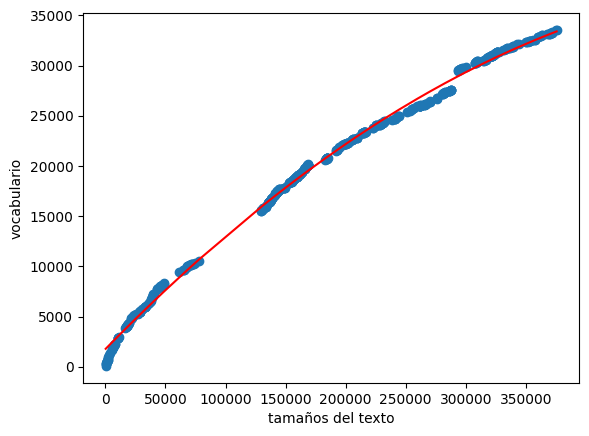

In [41]:
x = np.array(docs_sizes)
y = np.array(vocabularios)

# Ajustar una función polinómica de segundo grado a los datos
z = np.polyfit(x, y, 2)
f = np.poly1d(z)


# Graficar los datos y la función ajustada
plt.scatter(x, y)
plt.plot(x, f(x), 'r',label="")
plt.ylabel("vocabulario")
plt.xlabel("tamaños del texto")
plt.show()